# 타이타닉 시각화

In [1]:
from plotnine import *
import pandas as pd

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

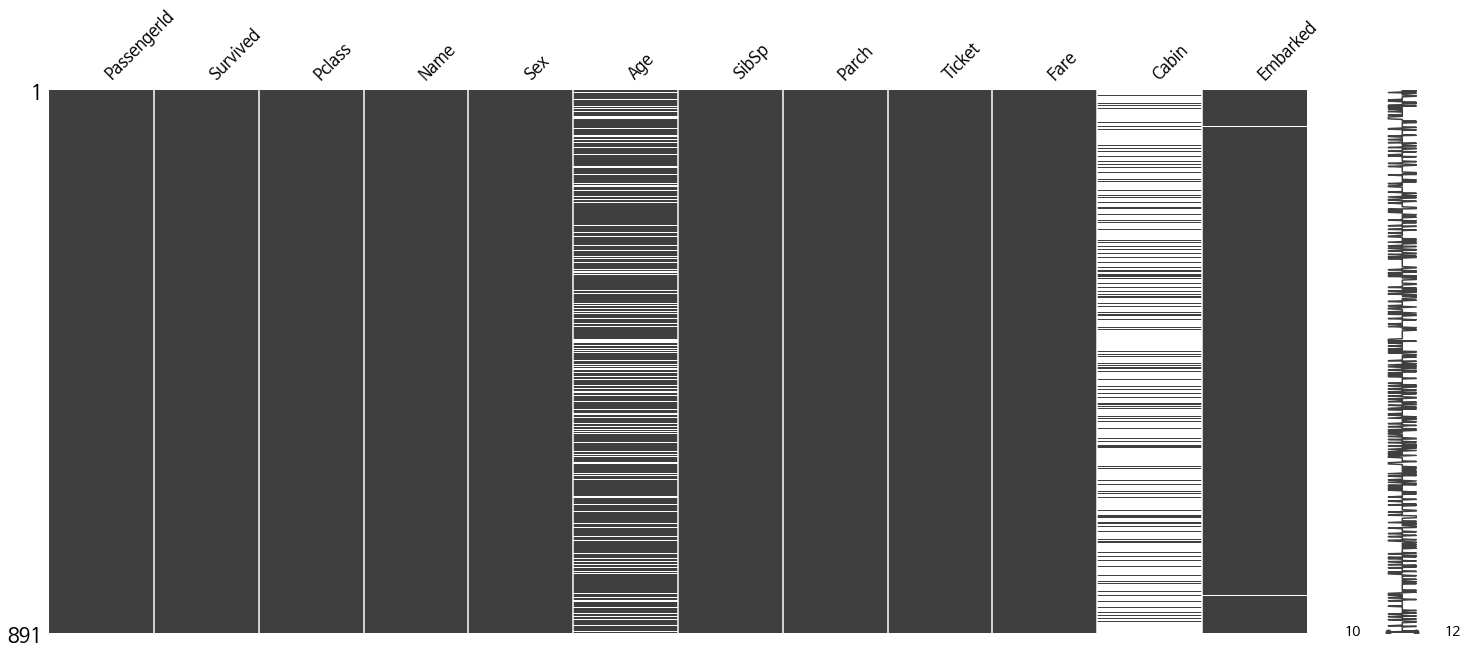

In [4]:
import missingno as msno

msno.matrix(train)

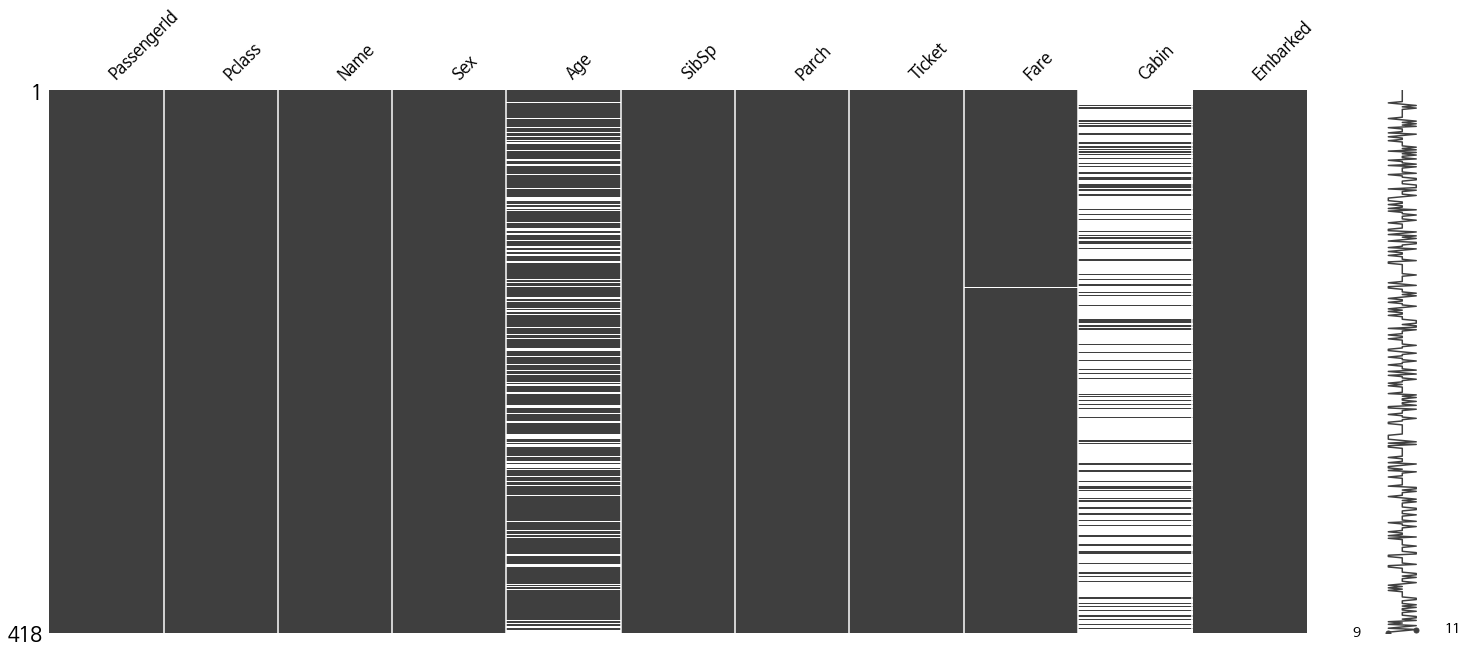

In [5]:
msno.matrix(test)

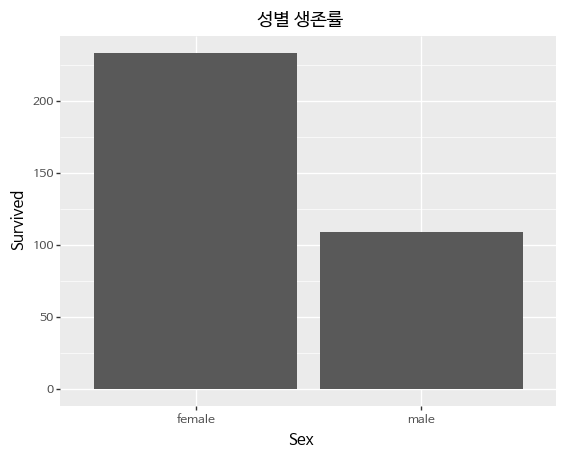

<ggplot: (290857150)>

In [6]:
(ggplot(train)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('성별 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

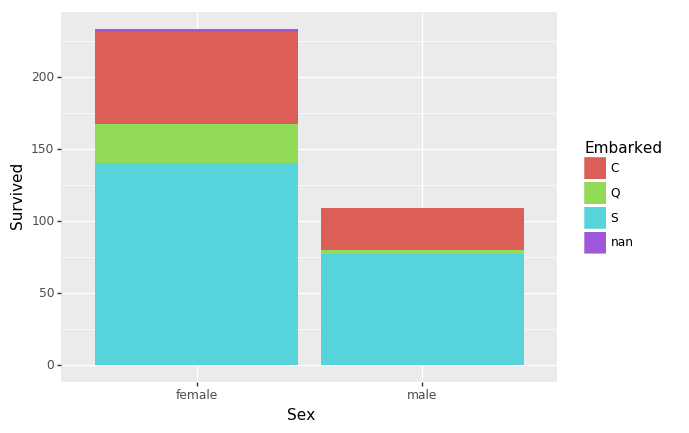

<ggplot: (290860573)>

In [7]:
(ggplot(train)
 + aes(x='Sex', y='Survived', fill='Embarked')
 + geom_col()
)

In [8]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# 숫자로 되어 있지만 카테고리 형태의 데이터이기 때문에 스트링으로 변경
train['Pclass'] = train['Pclass'].astype('str')

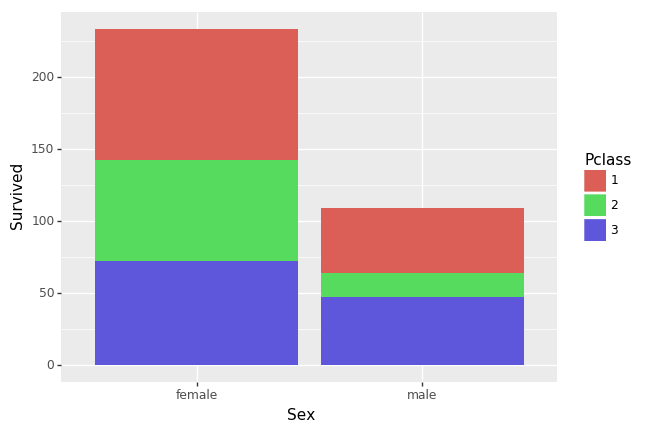

<ggplot: (294614287)>

In [10]:
(ggplot(train)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

In [11]:
train_dropna_age = train['Age'].dropna()

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


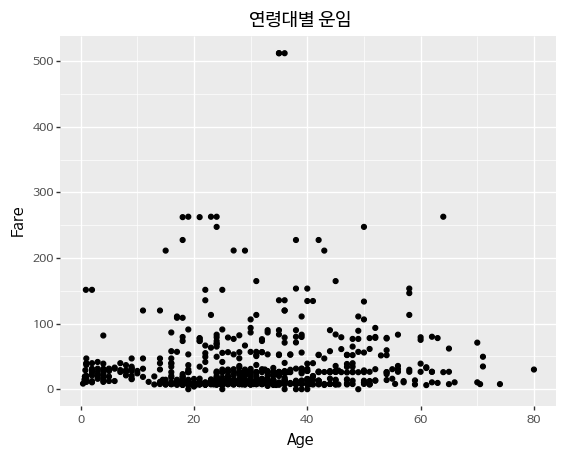

<ggplot: (-9223372036560433888)>

In [12]:
(ggplot(train)
 + aes(x='Age', y='Fare')
 + geom_point()
 + ggtitle('연령대별 운임')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [13]:
train['Survived'] = train['Survived'].astype('category')

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


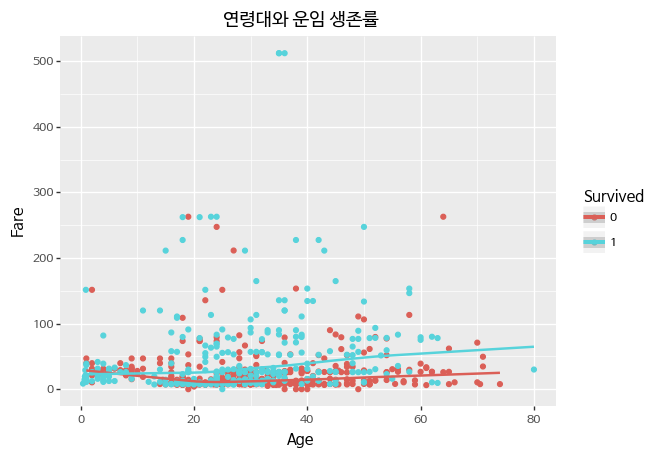

<ggplot: (290508650)>

In [14]:
(ggplot(train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('연령대와 운임 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


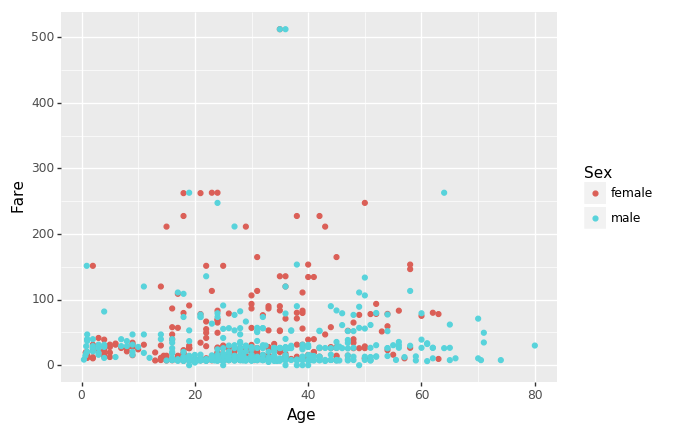

<ggplot: (-9223372036560339936)>

In [15]:
# 나이와 요금 성별의 상관관계 보기
(ggplot(train)
 + aes(x='Age', y='Fare', color='Sex')
 + geom_point()
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


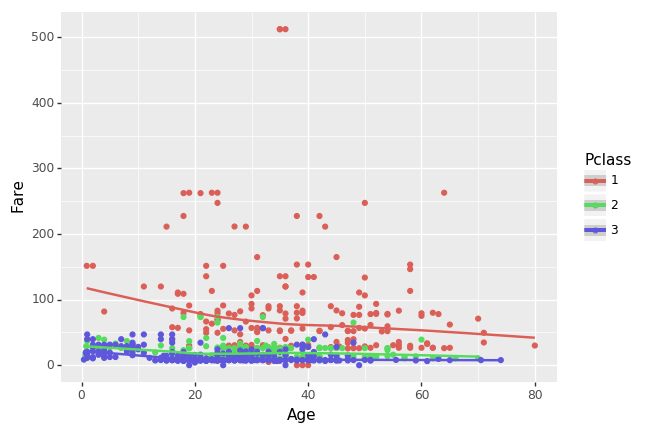

<ggplot: (295217612)>

In [16]:
# 나이와 요금에 상관관계가 있을까?
(ggplot(train)
 + aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 + stat_smooth()
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


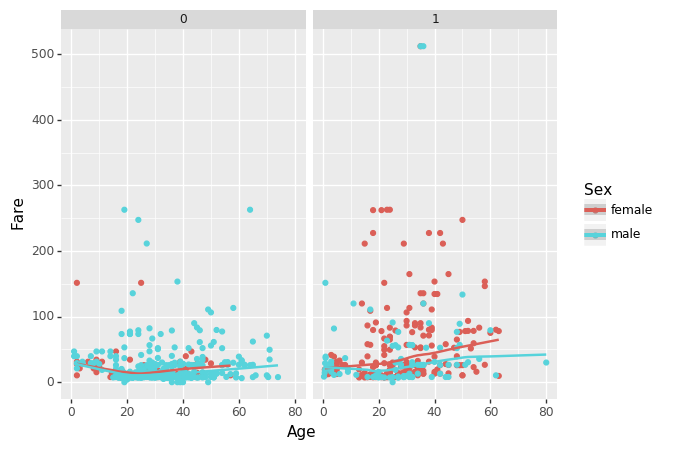

<ggplot: (-9223372036559318121)>

In [17]:
(ggplot(train) 
 + aes(x='Age', y='Fare', color='Sex')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Survived')
)

In [18]:
# 숫자로 되어 있지만 카테고리 형태의 데이터이기 때문에 카테고리로 변경
train['Survived'] = train['Survived'].astype('category')

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


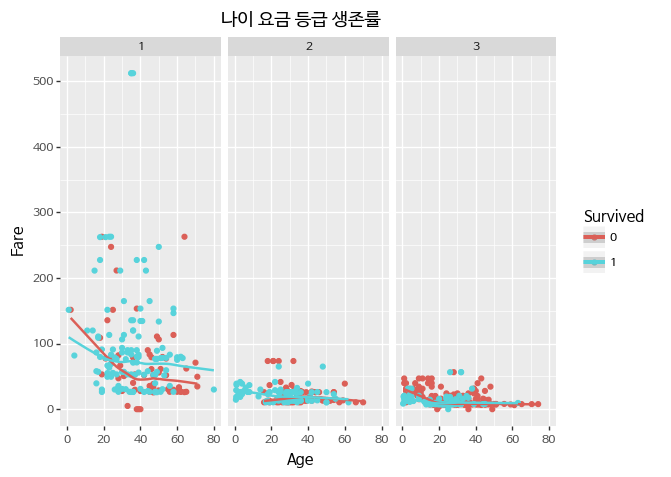

<ggplot: (-9223372036559124073)>

In [19]:
# 나이와 요금 성별의 상관관계 보기
(ggplot(train) 
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Pclass')
 + ggtitle('나이 요금 등급 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


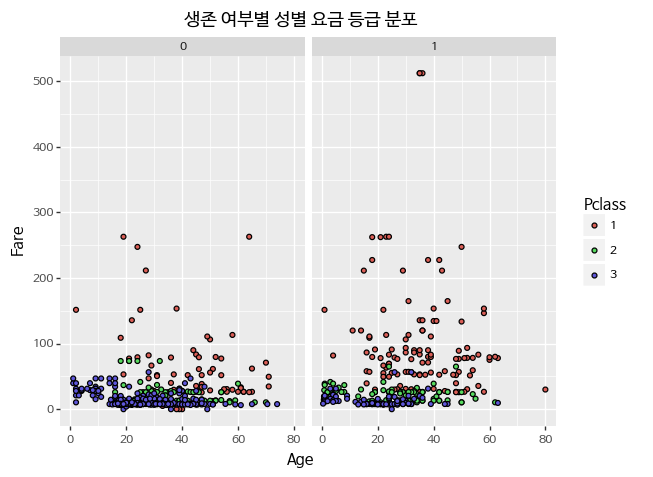

<ggplot: (295835193)>

In [20]:
(ggplot(train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('생존 여부별 성별 요금 등급 분포')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


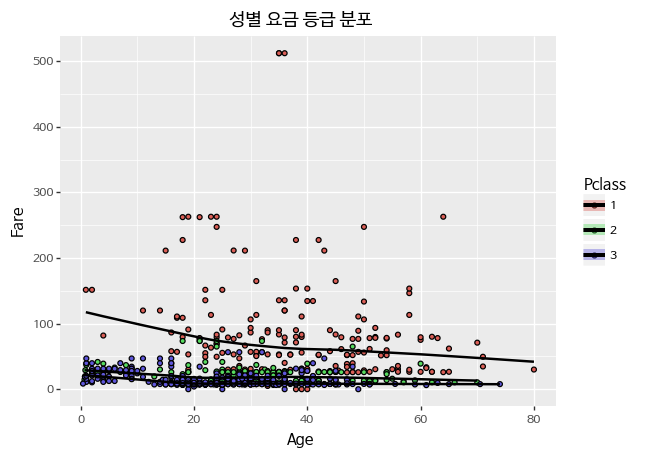

<ggplot: (295167261)>

In [21]:
(ggplot(train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + stat_smooth()
 + ggtitle('성별 요금 등급 분포')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


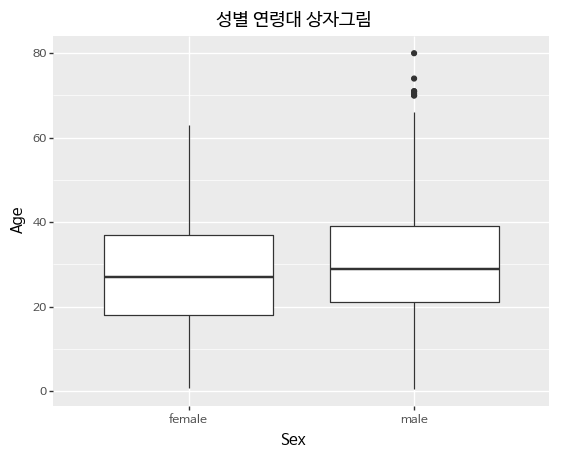

<ggplot: (-9223372036560442024)>

In [22]:
# 나이와 요금 성별의 상관관계 보기
(ggplot(train) 
 + aes(x='Sex', y='Age')
 + geom_boxplot()
 + ggtitle('성별 연령대 상자그림')
 + theme(text=element_text(family='NanumBarunGothic'))
)

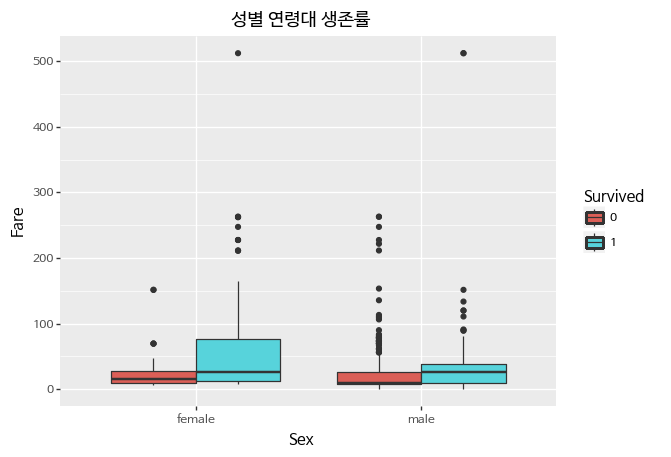

<ggplot: (294632768)>

In [23]:
(ggplot(train) 
 + aes(x='Sex', y='Fare', fill='Survived')
 + geom_boxplot()
 + ggtitle('성별 연령대 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


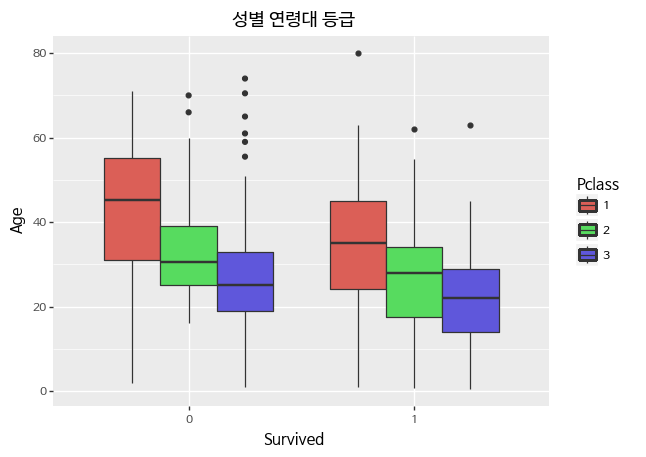

<ggplot: (294338133)>

In [24]:
(ggplot(train) 
 + aes(x='Survived', y='Age', fill='Pclass')
 + geom_boxplot()
 + ggtitle('성별 연령대 등급')
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 계속 Age의 결측치 오류가 나고 있습니다.
* 보정 후 값을 비교해 봅시다.

In [25]:
# 중간값으로 누락된 나이 데이터를 채워준다.
train['Age_median'] = train['Age']
train['Age_mean'] = train['Age']
train['Age_mode'] = train['Age']

train['Age_median'].fillna(train['Age'].median(), inplace = True)
train['Age_mean'].fillna(train['Age'].mean(), inplace = True)
train['Age_mode'].fillna(train['Age'].mode()[0], inplace = True)

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


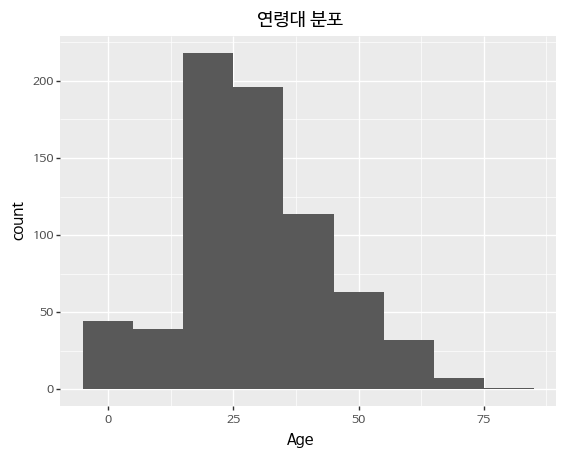

<ggplot: (-9223372036560345228)>

In [26]:
(ggplot(train) 
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('연령대 분포')
 + theme(text=element_text(family='NanumBarunGothic'))
)

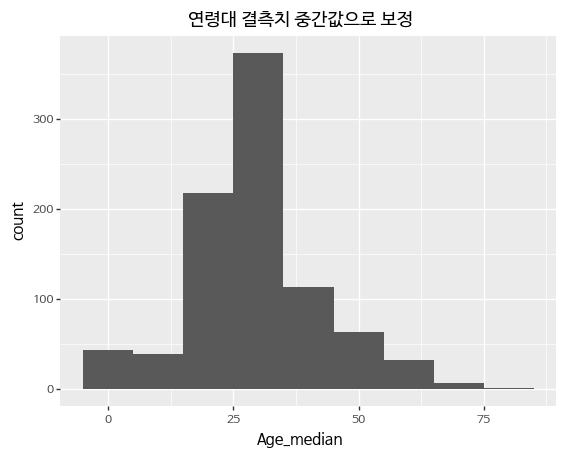

<ggplot: (-9223372036560410943)>

In [27]:
(ggplot(train) 
 + aes(x='Age_median')
 + geom_histogram(binwidth=10)
 + ggtitle('연령대 결측치 중간값으로 보정')
 + theme(text=element_text(family='NanumBarunGothic'))
)

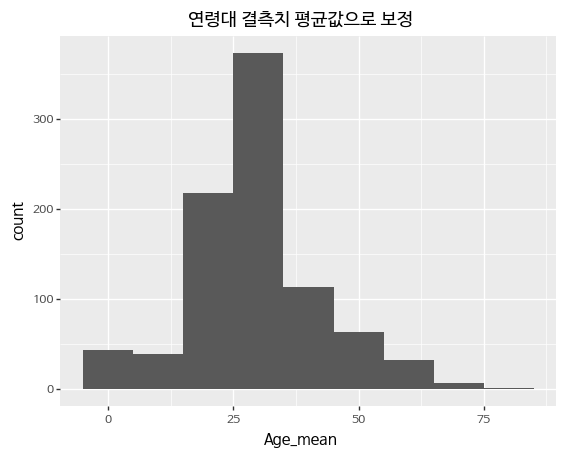

<ggplot: (-9223372036560334606)>

In [28]:
(ggplot(train) 
 + aes(x='Age_mean')
 + geom_histogram(binwidth=10)
 + ggtitle('연령대 결측치 평균값으로 보정')
 + theme(text=element_text(family='NanumBarunGothic'))
)

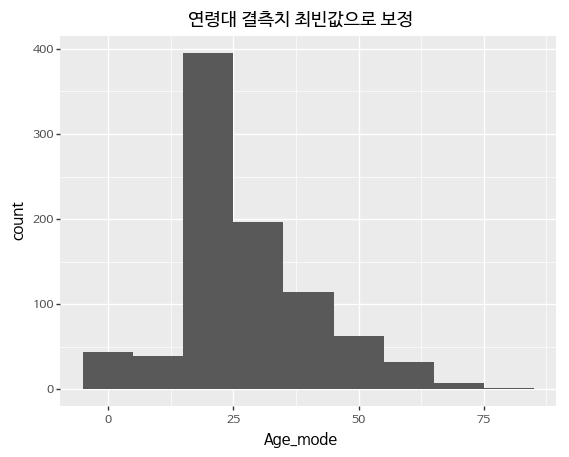

<ggplot: (294376491)>

In [29]:
(ggplot(train) 
 + aes(x='Age_mode')
 + geom_histogram(binwidth=10)
 + ggtitle('연령대 결측치 최빈값으로 보정')
 + theme(text=element_text(family='NanumBarunGothic'))
)